In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd

# Excel 파일 읽기
data = pd.read_excel('/content/drive/MyDrive/감성대화말뭉치(최종데이터)_Training.xlsx')

# 데이터 확인
print(data.head())

   Unnamed: 0  연령  성별     상황키워드  신체질환 감정_대분류 감정_소분류  \
0           1  청년  여성  진로,취업,직장  해당없음     분노  노여워하는   
1           2  청년  여성  진로,취업,직장  해당없음     분노  노여워하는   
2           3  청년  여성  진로,취업,직장  해당없음     분노  노여워하는   
3           4  청년  여성  진로,취업,직장  해당없음     분노  노여워하는   
4           5  청년  여성  진로,취업,직장  해당없음     분노  노여워하는   

                                               사람문장1  \
0                          일은 왜 해도 해도 끝이 없을까? 화가 난다.   
1     이번 달에 또 급여가 깎였어! 물가는 오르는데 월급만 자꾸 깎이니까 너무 화가 나.   
2  회사에 신입이 들어왔는데 말투가 거슬려. 그런 애를 매일 봐야 한다고 생각하니까 스...   
3  직장에서 막내라는 이유로 나에게만 온갖 심부름을 시켜. 일도 많은 데 정말 분하고 ...   
4              얼마 전 입사한 신입사원이 나를 무시하는 것 같아서 너무 화가 나.   

                                              시스템문장1  \
0                        많이 힘드시겠어요. 주위에 의논할 상대가 있나요?   
1           급여가 줄어 속상하시겠어요. 월급이 줄어든 것을 어떻게 보완하실 건가요?   
2  회사 동료 때문에 스트레스를 많이 받는 것 같아요. 문제 해결을 위해 어떤 노력을 ...   
3  관련 없는 심부름을 모두 하게 되어서 노여우시군요. 어떤 것이 상황을 나아질 수 있...   
4  무시하는 것 같은 태도에 화가 나셨군요. 상대방의 어떤 행동이 그런 감정을 유발하는...

In [3]:
# 분석에 필요 없는 열 제거
columns_to_drop = ['성별', '연령', '상황키워드', '신체질환', '시스템문장1', '시스템문장2', '시스템문장3']
data = data.drop(columns=columns_to_drop, errors='ignore')

# 결측값 처리 (결측값을 특정 값으로 채우거나 제거)
data = data.dropna()  # 결측값이 포함된 행 제거

print("\n전처리 후 데이터프레임:")
print(data.head())


전처리 후 데이터프레임:
     Unnamed: 0 감정_대분류 감정_소분류  \
304         305     상처     상처   
305         306     상처     상처   
306         307     상처     상처   
307         308     상처     상처   
308         309     상처     상처   

                                                 사람문장1  \
304    지금까지 힘들게 일했는데 은퇴해서 돈이 없다고 하니 자식이 화를 내서 상처를 받았어.   
305  친구한테 은퇴할 거라고 얘기했더니 앞으로 뭘 먹고 살 거냐면서 비웃더라고. 기분이 ...   
306   친구한테 은퇴한다고 했더니 그게 말이나 되는 거냐며 날 한심한 사람 취급해서 서운했어.   
307  그동안 열심히 달려와서 좀 쉬려고 하는데 은퇴한다고 하니 주변에서 다 말려서 기분이...   
308   많은 고민 후 은퇴를 결심했는데 주변에서 다들 섣부른 생각이라고 해서 마음이 안 좋아.   

                                          사람문장2  \
304        너무 화가 나. 도와줬던 건 기억 못 하고 더 받을 생각만 하니.   
305      아주 나쁜 친구야. 은퇴를 내가 하고 싶어 하는 것도 아닌데 말이야.   
306  맞아. 그동안 내가 얼마나 힘들게 일했는지 알고 있으면서 그런 말을 하다니.   
307       응. 그렇지만 내 결정에 다들 냉담하게 반응하니 기분이 좋지 않아.   
308    힘들게 결심했는데 다들 반대하니까 조금 더 고민해 보는 게 좋을까 싶어.   

                                                 사람문장3  
304  앞으로는 자식보다 나를 생각하며 살아야겠어. 자식 위해 살아도 필요 없다는 말 이제...  
305        은퇴 후 

In [4]:
!pip install -q mlxtend

In [5]:
!pip install -q ace_tools

In [28]:
#이건 우울증 라벨링 한 코드 - apriori만 사용(약간의 n-gram 뭐시기 포함)
import pandas as pd
import re
from sklearn.feature_extraction.text import CountVectorizer
from mlxtend.frequent_patterns import apriori, association_rules

# 불용어 및 감정 키워드 설정
stopwords = ['내', '내가', '너무', '것', '같아', '수', '있는', '그', '이', '저', '및', '그리고', '다', '을', '는', '에', '가', '의', '도', '더', '같아서']
negative_keywords = ['우울해', '속상해', '답답해', '불안해', '슬퍼', '화가', '괴로워', '힘들어', '눈물']

# 텍스트 정제 함수
def clean_text(text):
    text = re.sub(r'[^ㄱ-ㅎㅏ-ㅣ가-힣 ]', '', text)  # 한글 및 공백만 남김
    text = re.sub(r'\s+', ' ', text).strip()  # 연속된 공백 제거
    words = text.split()
    words = [word for word in words if word not in stopwords]  # 불용어 제거
    return ' '.join(words)

# 주요 텍스트 병합 및 정제
data['전체문장'] = data[['사람문장1', '사람문장2', '사람문장3']].fillna('').apply(' '.join, axis=1)
data['전체문장_정제'] = data['전체문장'].apply(clean_text)

# 우울증 여부 라벨링 (1: 우울증 환자, 0: 일반인)
def label_depression(row):
    if row in ['슬픔', '불안', '상처']:
        return 1  # 우울증 환자
    else:
        return 0  # 일반인

data['우울증_여부'] = data['감정_대분류'].apply(label_depression)

# 텍스트에 감정 키워드 강조
def emphasize_keywords(text, keywords):
    for keyword in keywords:
        if keyword in text:
            text = text.replace(keyword, f"{keyword} {keyword} {keyword}")  # 3배 강조
    return text

data['전체문장_강조'] = data['전체문장_정제'].apply(lambda x: emphasize_keywords(x, negative_keywords))

# 감정 키워드만 남기기
def extract_keywords(text, keywords):
    return ' '.join([word for word in text.split() if word in keywords])

data['키워드_문장'] = data['전체문장_정제'].apply(lambda x: extract_keywords(x, negative_keywords))

# 키워드가 포함된 데이터만 필터링
filtered_data = data[data['키워드_문장'].str.strip() != ""]

# 단어 빈도 추출 (n-grams 적용: 단일 단어부터 3단어 조합까지 분석)
vectorizer = CountVectorizer(tokenizer=lambda x: x.split(), max_features=1000, ngram_range=(1, 3))  # trigram 적용
X = vectorizer.fit_transform(filtered_data['키워드_문장'])
word_matrix = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())

# 우울증 여부 열 추가 (우울증 라벨링과 연계)
word_matrix['우울증_여부'] = filtered_data['우울증_여부'].values

# 우울증 여부별로 단어 상관관계 분석
for label in [1, 0]:  # 1: 우울증 환자, 0: 일반인
    print(f"\n우울증 여부: {label}")

    # 우울증 여부별 데이터 필터링 및 우울증_여부 열 제거
    subset = word_matrix[word_matrix['우울증_여부'] == label].drop(columns=['우울증_여부'])

    # 이진화 확인 (값이 0 또는 1만 포함)
    subset = subset.applymap(lambda x: 1 if x > 0 else 0)  # 이진화 보장
    subset = subset.astype(bool)  # bool 타입으로 변환

    # Apriori 알고리즘 적용 (최소 지원도 0.1%)
    frequent_itemsets = apriori(subset, min_support=0.005, use_colnames=True)
    rules = association_rules(frequent_itemsets, num_itemsets=len(word_matrix), metric="lift", min_threshold=1.0)

    # 결과 출력
    if not rules.empty:
        print(rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']])
    else:
        print("생성된 연관 규칙이 없습니다.")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:521: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
<ipython-input-28-d5102e88db41>:66: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  subset = subset.applymap(lambda x: 1 if x > 0 else 0)  # 이진화 보장



우울증 여부: 1
      antecedents    consequents   support  confidence       lift
0       (불안해 불안해)          (불안해)  0.007625    1.000000   5.939002
1           (불안해)      (불안해 불안해)  0.007625    0.045287   5.939002
2            (슬퍼)        (슬퍼 슬퍼)  0.009181    0.030633   3.336449
3         (슬퍼 슬퍼)           (슬퍼)  0.009181    1.000000   3.336449
4            (슬퍼)       (슬퍼 힘들어)  0.006225    0.020768   3.336449
5        (슬퍼 힘들어)           (슬퍼)  0.006225    1.000000   3.336449
6        (힘들어 슬퍼)           (슬퍼)  0.007470    1.000000   3.336449
7            (슬퍼)       (힘들어 슬퍼)  0.007470    0.024922   3.336449
8           (힘들어)       (슬퍼 힘들어)  0.006225    0.025940   4.167315
9        (슬퍼 힘들어)          (힘들어)  0.006225    1.000000   4.167315
10       (힘들어 슬퍼)          (힘들어)  0.007470    1.000000   4.167315
11          (힘들어)       (힘들어 슬퍼)  0.007470    0.031128   4.167315
12      (힘들어 힘들어)          (힘들어)  0.010582    1.000000   4.167315
13          (힘들어)      (힘들어 힘들어)  0.010582    0.044099   4.167315

<ipython-input-28-d5102e88db41>:66: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  subset = subset.applymap(lambda x: 1 if x > 0 else 0)  # 이진화 보장


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:521: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
<ipython-input-31-159f675dd0c5>:54: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  subset = subset.applymap(lambda x: 1 if x > 0 else 0)



우울증 여부: 1


/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(
<ipython-input-31-159f675dd0c5>:54: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  subset = subset.applymap(lambda x: 1 if x > 0 else 0)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


  antecedents consequents   support  confidence      lift
0   (불안해 불안해)       (불안해)  0.007625    1.000000  5.939002
1       (불안해)   (불안해 불안해)  0.007625    0.045287  5.939002
2        (슬퍼)     (슬퍼 슬퍼)  0.009181    0.030633  3.336449
3     (슬퍼 슬퍼)        (슬퍼)  0.009181    1.000000  3.336449
4        (슬퍼)    (슬퍼 힘들어)  0.006225    0.020768  3.336449

우울증 여부: 0
  antecedents consequents   support  confidence      lift
0    (화가 속상해)       (속상해)  0.005797    1.000000  7.536408
1       (속상해)    (화가 속상해)  0.005797    0.043689  7.536408
2    (화가 속상해)        (화가)  0.005797    1.000000  2.191249
3        (화가)    (화가 속상해)  0.005797    0.012703  2.191249
4     (화가 화가)        (화가)  0.047665    1.000000  2.191249


<ipython-input-31-159f675dd0c5>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['군집'] = kmeans.labels_



K-Means 군집화 결과

군집 0 주요 단어:
우울증_여부    4884
슬퍼        2053
화가        1948
불안해       1218
속상해       1197
우울해        599
괴로워        530
답답해        269
화가 화가      168
슬퍼 슬퍼       62
dtype: int64

군집 1 주요 단어:
힘들어        2400
우울증_여부     1542
힘들어 힘들어     102
슬퍼           93
힘들어 슬퍼       49
슬퍼 힘들어       43
괴로워          42
속상해          39
우울해          36
화가           34
dtype: int64


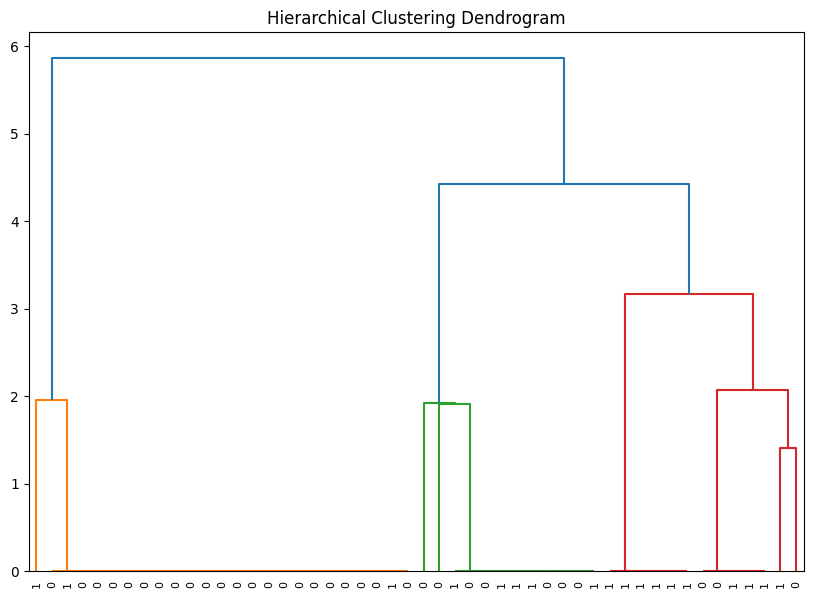

In [31]:
#이건 우울증 라벨링 + apriori + K-means + Hierarchical Clustering 사용해서 더 정교한 분석한거
import pandas as pd
import re
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt
from mlxtend.frequent_patterns import apriori, association_rules

# 불용어 및 감정 키워드 설정
stopwords = ['내', '내가', '너무', '것', '같아', '수', '있는', '그', '이', '저', '및', '그리고', '다', '을', '는', '에', '가', '의', '도', '더', '같아서']
negative_keywords = ['우울해', '속상해', '답답해', '불안해', '슬퍼', '화가', '괴로워', '힘들어', '눈물']

# 텍스트 정제 함수
def clean_text(text):
    text = re.sub(r'[^ㄱ-ㅎㅏ-ㅣ가-힣 ]', '', text)  # 한글 및 공백만 남김
    text = re.sub(r'\s+', ' ', text).strip()  # 연속된 공백 제거
    words = text.split()
    words = [word for word in words if word not in stopwords]  # 불용어 제거
    return ' '.join(words)

# 주요 텍스트 병합 및 정제
data['전체문장'] = data[['사람문장1', '사람문장2', '사람문장3']].fillna('').apply(' '.join, axis=1)
data['전체문장_정제'] = data['전체문장'].apply(clean_text)

# 우울증 여부 라벨링 (1: 우울증 환자, 0: 일반인)
def label_depression(row):
    if row in ['슬픔', '불안', '상처']:
        return 1  # 우울증 환자
    else:
        return 0  # 일반인

data['우울증_여부'] = data['감정_대분류'].apply(label_depression)

# 감정 키워드만 남기기
def extract_keywords(text, keywords):
    return ' '.join([word for word in text.split() if word in keywords])

data['키워드_문장'] = data['전체문장_정제'].apply(lambda x: extract_keywords(x, negative_keywords))

# 키워드가 포함된 데이터만 필터링
filtered_data = data[data['키워드_문장'].str.strip() != ""]

# 단어 빈도 추출 (n-grams 적용: 단일 단어부터 3단어 조합까지 분석)
vectorizer = CountVectorizer(tokenizer=lambda x: x.split(), max_features=1000, ngram_range=(1, 3))  # trigram 적용
X = vectorizer.fit_transform(filtered_data['키워드_문장'])
word_matrix = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())
word_matrix['우울증_여부'] = filtered_data['우울증_여부'].values

# Apriori 분석 유지
for label in [1, 0]:  # 1: 우울증 환자, 0: 일반인
    print(f"\n우울증 여부: {label}")
    subset = word_matrix[word_matrix['우울증_여부'] == label].drop(columns=['우울증_여부'])
    subset = subset.applymap(lambda x: 1 if x > 0 else 0)
    frequent_itemsets = apriori(subset, min_support=0.005, use_colnames=True)
    rules = association_rules(frequent_itemsets, num_itemsets=len(word_matrix), metric="lift", min_threshold=1.0)
    if not rules.empty:
        print(rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']].head())
    else:
        print("생성된 연관 규칙이 없습니다.")

# K-Means 군집화
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X)

# 군집화 결과 추가
filtered_data['군집'] = kmeans.labels_

# 군집별 주요 단어 출력
print("\nK-Means 군집화 결과")
for cluster in range(2):
    cluster_words = word_matrix[kmeans.labels_ == cluster].sum().sort_values(ascending=False).head(10)
    print(f"\n군집 {cluster} 주요 단어:\n{cluster_words}")

# Hierarchical Clustering (계층적 군집화)
linkage_matrix = linkage(X.toarray()[:50], method='ward')  # 데이터 크기가 크면 일부 샘플링
plt.figure(figsize=(10, 7))
dendrogram(linkage_matrix, labels=filtered_data['우울증_여부'][:50].values)
plt.title('Hierarchical Clustering Dendrogram')
plt.show()

In [22]:
#이건 우울증에 대한 라벨링 안한 코드
import pandas as pd
import re
from sklearn.feature_extraction.text import CountVectorizer
from mlxtend.frequent_patterns import apriori, association_rules

# # 필요한 컬럼만 선택 및 대화 병합
# data['전체문장'] = data[['사람문장1', '사람문장2', '사람문장3']].fillna('').apply(' '.join, axis=1)

# 불용어 및 감정 키워드 설정
stopwords = ['내', '내가', '너무', '것', '같아', '수', '있는', '그', '이', '저', '및', '그리고', '다', '을', '는', '에', '가', '의', '도', '더', '같아서']
negative_keywords = ['우울해', '속상해', '답답해', '불안해', '슬퍼', '화가', '괴로워', '힘들어', '눈물']

# 텍스트 정제 함수
def clean_text(text):
    text = re.sub(r'[^ㄱ-ㅎㅏ-ㅣ가-힣 ]', '', text)  # 한글 및 공백만 남김
    text = re.sub(r'\s+', ' ', text).strip()  # 연속된 공백 제거
    words = text.split()
    words = [word for word in words if word not in stopwords]  # 불용어 제거
    return ' '.join(words)

# 주요 텍스트 병합 및 정제
data['전체문장'] = data[['사람문장1', '사람문장2', '사람문장3']].fillna('').apply(' '.join, axis=1)
data['전체문장_정제'] = data['전체문장'].apply(clean_text)

# 부정적 감정 데이터 필터링
negative_emotions = ['슬픔', '불안', '상처']  # 부정적 감정 대분류
#positive_emotions = ['행복', '감사']  # 긍정적 감정 예시
negative_df = data[data['감정_대분류'].isin(negative_emotions)]
#negative_df = negative_df.sample(frac=0.1, random_state=42)  # 데이터 샘플링(RAM 사용제한 때문에 전체 데이터 중 10%만 사용)

# 텍스트에 감정 키워드 강조
def emphasize_keywords(text, keywords):
    for keyword in keywords:
        if keyword in text:
            text = text.replace(keyword, f"{keyword} {keyword} {keyword}")  # 3배 강조
    return text

negative_df['전체문장_강조'] = negative_df['전체문장_정제'].apply(lambda x: emphasize_keywords(x, negative_keywords))

# 감정 키워드만 남기기
def extract_keywords(text, keywords):
    return ' '.join([word for word in text.split() if word in keywords])

negative_df['키워드_문장'] = negative_df['전체문장_정제'].apply(lambda x: extract_keywords(x, negative_keywords))

# 키워드가 포함된 데이터만 필터링
negative_df_filtered = negative_df[negative_df['키워드_문장'].str.strip() != ""]

# 단어 빈도 추출 (n-grams 적용)3단어 조합도 포함해서 분
vectorizer = CountVectorizer(tokenizer=lambda x: x.split(), max_features=1000, ngram_range=(1, 3))  # trigram 적용
X = vectorizer.fit_transform(negative_df_filtered['키워드_문장'])
word_matrix = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())

# Apriori 적용을 위해 이진화
word_matrix = word_matrix.applymap(lambda x: 1 if x > 0 else 0)

# Apriori 적용
frequent_itemsets = apriori(word_matrix, min_support=0.005, use_colnames=True)
rules = association_rules(frequent_itemsets, num_itemsets=len(word_matrix), metric="lift", min_threshold=1.0)

# 결과 출력
if not rules.empty:
    print(rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']])
else:
    print("생성된 연관 규칙이 없습니다. 데이터를 확인하세요.")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-22-7febe17613cd>:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  negative_df['전체문장_강조'] = negative_df['전체문장_정제'].apply(lambda x: emphasize_keywords(x, negative_keywords))
<ipython-input-22-7febe17613cd>:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docum

      antecedents    consequents   support  confidence       lift
0       (불안해 불안해)          (불안해)  0.007625    1.000000   5.939002
1           (불안해)      (불안해 불안해)  0.007625    0.045287   5.939002
2            (슬퍼)        (슬퍼 슬퍼)  0.009181    0.030633   3.336449
3         (슬퍼 슬퍼)           (슬퍼)  0.009181    1.000000   3.336449
4            (슬퍼)       (슬퍼 힘들어)  0.006225    0.020768   3.336449
5        (슬퍼 힘들어)           (슬퍼)  0.006225    1.000000   3.336449
6        (힘들어 슬퍼)           (슬퍼)  0.007470    1.000000   3.336449
7            (슬퍼)       (힘들어 슬퍼)  0.007470    0.024922   3.336449
8        (슬퍼 힘들어)          (힘들어)  0.006225    1.000000   4.167315
9           (힘들어)       (슬퍼 힘들어)  0.006225    0.025940   4.167315
10       (힘들어 슬퍼)          (힘들어)  0.007470    1.000000   4.167315
11          (힘들어)       (힘들어 슬퍼)  0.007470    0.031128   4.167315
12      (힘들어 힘들어)          (힘들어)  0.010582    1.000000   4.167315
13          (힘들어)      (힘들어 힘들어)  0.010582    0.044099   4.167315
14   (슬퍼, 

<ipython-input-22-7febe17613cd>:55: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  word_matrix = word_matrix.applymap(lambda x: 1 if x > 0 else 0)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [24]:
# 결과 출력
print(rules)

      antecedents    consequents  antecedent support  consequent support  \
0        (화가 속상해)          (속상해)            0.005797            0.132689   
1           (속상해)       (화가 속상해)            0.132689            0.005797   
2        (화가 속상해)           (화가)            0.005797            0.456361   
3            (화가)       (화가 속상해)            0.456361            0.005797   
4         (화가 화가)           (화가)            0.047665            0.456361   
5            (화가)        (화가 화가)            0.456361            0.047665   
6       (힘들어 힘들어)          (힘들어)            0.009662            0.243156   
7           (힘들어)      (힘들어 힘들어)            0.243156            0.009662   
8    (화가 속상해, 화가)          (속상해)            0.005797            0.132689   
9   (화가 속상해, 속상해)           (화가)            0.005797            0.456361   
10      (화가, 속상해)       (화가 속상해)            0.009662            0.005797   
11       (화가 속상해)      (화가, 속상해)            0.005797            0.009662   
12          

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [25]:
# # 결과 확인 -> 에러뜸
# import ace_tools as tools
# tools.display_dataframe_to_user(name="Apriori Rules", dataframe=rules)
# 결과를 파일로 저장 (CSV)
output_file = '/content/drive/MyDrive/Apriori_Rules.csv'
rules.to_csv(output_file, index=False)
print(f"결과가 {output_file}에 저장되었습니다.")
print(rules.head())  # Apriori 규칙의 상위 5개 출력

결과가 /content/drive/MyDrive/Apriori_Rules.csv에 저장되었습니다.
  antecedents consequents  antecedent support  consequent support   support  \
0    (화가 속상해)       (속상해)            0.005797            0.132689  0.005797   
1       (속상해)    (화가 속상해)            0.132689            0.005797  0.005797   
2    (화가 속상해)        (화가)            0.005797            0.456361  0.005797   
3        (화가)    (화가 속상해)            0.456361            0.005797  0.005797   
4     (화가 화가)        (화가)            0.047665            0.456361  0.047665   

   confidence      lift  representativity  leverage  conviction  \
0    1.000000  7.536408               1.0  0.005028         inf   
1    0.043689  7.536408               1.0  0.005028    1.039623   
2    1.000000  2.191249               1.0  0.003152         inf   
3    0.012703  2.191249               1.0  0.003152    1.006995   
4    1.000000  2.191249               1.0  0.025913         inf   

   zhangs_metric   jaccard  certainty  kulczynski  
0       0.87236

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
